# Rank Estimation by CGPA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("C:\\Users\\Charan Akula\\Desktop\\Charan\\ml\\datasets\\R20BLT2.csv")

In [3]:
df

,puc_gpa,RANK
0,10.00,1
1,10.00,2
2,10.00,3
3,10.00,4
4,10.00,5
...,...,...
939,6.95,940
940,6.87,941
941,6.77,942
942,6.67,943


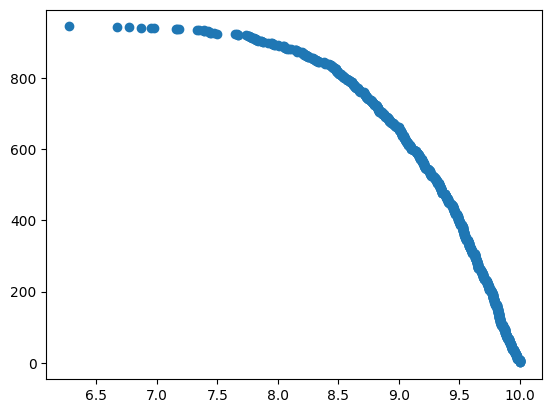

In [4]:
plt.scatter(df["puc_gpa"],df["RANK"])

In [5]:
X=np.array(df.iloc[:,[0]])
Y=np.array(df.iloc[:,[1]])
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25)

# Linear Regression

In [6]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [7]:
model.predict([[6.85]])

array([[1416.31306349]])

In [8]:
y_pred=model.predict(x_test)

In [9]:
r2_score(y_test,y_pred)

0.8869440057313611

# Polynomial Regression

In [10]:
model.intercept_

array([4152.99393849])

In [11]:
model.coef_

array([[-399.5154562]])

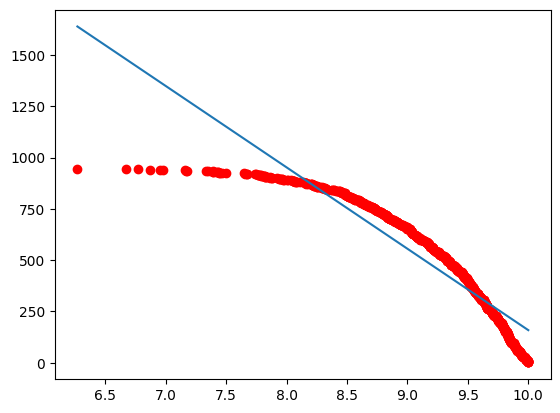

In [12]:

plt.scatter(df["puc_gpa"],df["RANK"],color="red")
plt.plot(df["puc_gpa"],-396.95838572*df["puc_gpa"]+4128.20121668)

In [13]:
# we can observe the varience and best fit line , mse will be high so to reduce mse and increase r2_score we will use polynomial regression because graph is some how non linear i.e parabolic

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly=PolynomialFeatures(degree=2)
x_ptrain=poly.fit_transform(x_train) # polynomailfeatures and fit_transform are used to get polynomial features for given input
x_ptest=poly.transform(x_test)

In [16]:
model=LinearRegression()
model.fit(x_ptrain,y_train)

LinearRegression()

In [17]:
y_ppred=model.predict(x_ptest)
r2_score(y_test,y_ppred)

0.9951155267946956

C:\Users\Charan Akula\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


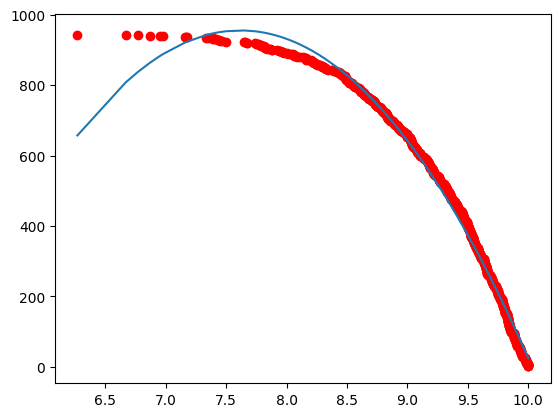

In [18]:
plt.scatter(df["puc_gpa"],df["RANK"],color="red")
plt.plot(df["puc_gpa"],model.predict(poly.transform(df[["puc_gpa"]])))

In [41]:
def find_rank(cgpa):
    demo=[[cgpa]]   
    demo=poly.transform(demo)
    return (model.predict(demo))[0][0] # for predicting, like regression i should not give values directly , because input values we gave by transforming into polynomial features so while predicting also we should give like that only

In [42]:
find_rank(9.78)

188.6430003742753